In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
 
from sklearn.externals.joblib import Memory
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import genfromtxt


In [4]:
def get_data():
    data = load_svmlight_file('./australian_scale.txt')
    return data[0], data[1]

In [5]:
def Linear_classification(X_train, X_validation, y_train, y_validation, learning_rate,max_iteration,lamda):
    num_records, num_features = np.shape(X)
    loss_train = []
    loss_validation = []
    W = np.random.normal(size=(num_features,1))
    
    for i in range(max_iteration):
        num_records_train, num_features_train = np.shape(X_train)
        num_records_validation, num_features_validation = np.shape(X_validation)
        #compute loss
        #Hinge loss = max(0, 1- y * (Wt * X ))
        #W = np.random.normal(loc = 0, scale = 1, size = (np.shape(X)))
        #hinge_loss_train = np.max[np.zeros(np.shape(X_train)), 1 - y_train * np.transpose(W_train) * X_train + b_train]
        #hinge_loss_validation = np.max[np.zeros(np.shape(X_validation)), 1 - y_validation * np.transpose(W_validation) * X_validation + b_validation]
        hinge_loss_train = 1.0 / float(num_records_train) * \
                                np.sum(np.max([np.zeros((num_records_train,1)),1 - y_train \
                               * (X_train.dot(W))],axis=0)) + 0.5 * lamda \
                                * W.transpose().dot(W)
        loss_train.append(hinge_loss_train[0][0])
        
        hinge_loss_validation = 1.0 / float(num_records_validation) * \
                                np.sum(np.max([np.zeros((num_records_validation,1)), \
                                1 - y_validation * (X_validation.dot(W))], axis = 0)) + 0.5 \
                                * lamda * W.transpose().dot(W)
        loss_validation.append(hinge_loss_validation[0][0])
        
        hinge_loss_gradient = np.max([np.zeros((num_records_train,1)),1 - y_train * (X_train.dot(W))],axis=0)
        indicator = np.zeros((num_records_train, 1))
        indicator[np.nonzero(hinge_loss_gradient)] = 1
        gradient_W = - 1.0 / float(num_records_train) * X_train.transpose().dot(y_train \
                * indicator).sum(axis = 1).reshape((num_features_train, 1)) + lamda * W
        W = W - learning_rate * gradient_W
        
    print('Iteration num = %d'%(max_iteration))
    ax = plt.subplot()
    line_train = ax.plot(range(max_iteration), loss_train, label = 'Train')
    line_validation = ax.plot(range(max_iteration), loss_validation, label = 'Validation')
    ax.set(xlabel = 'Iterations', ylabel = 'Loss')
    plt.legend()
    plt.show()
    return



In [6]:
X,y = get_data()
y = y.reshape((len(y), 1))
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 1)


Iteration num = 200


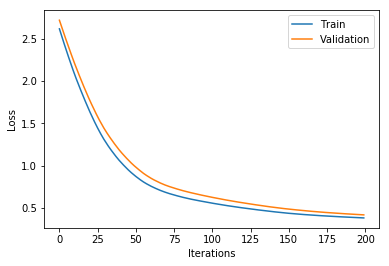

Iteration num = 500


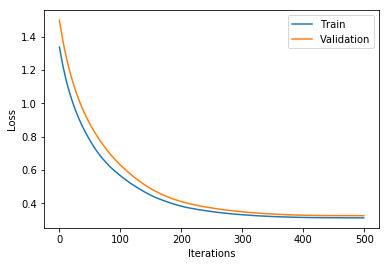

Iteration num = 1000


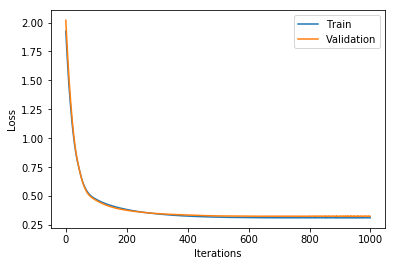

Iteration num = 1500


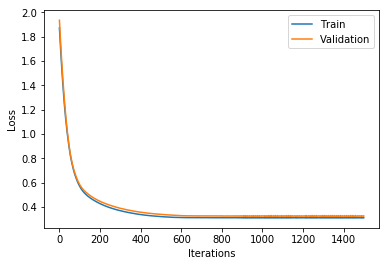

Iteration num = 2000


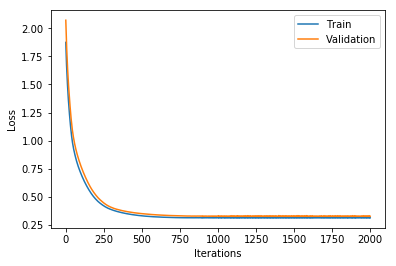

Iteration num = 5000


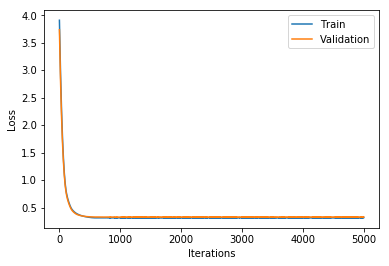

In [13]:
max_iteration = [ 200, 500, 1000, 1500, 2000 , 5000 ]
learning_rate = 0.05
lamda = 0.05
for i in range(len(max_iteration)):
    Linear_classification(X_train, X_validation, y_train, y_validation,learning_rate,max_iteration[i],lamda)

